In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F

<div style="border: 2px solid #1f77b4; padding: 10px;">
    <h2>Table of Contents</h2>
    <ul style="font-size: 16px;">
        <li><a style="color: #1f77b4; text-decoration: none;">1. Explanation of torch.nn.Linear Layer</a></li>
        <li><a style="color: #1f77b4; text-decoration: none;">2. Explanation of Normalization in Neural Networks</a></li>
        <li><a style="color: #1f77b4; text-decoration: none;">3. Importance of Embedding for Categorical Variables</a></li>
        <li><a style="color: #1f77b4; text-decoration: none;">4. Purpose of Activation Functions in Neural Networks</a></li>
        <li><a style="color: #1f77b4; text-decoration: none;">5. Dropout Layer in PyTorch</a></li>
    </ul>
</div>

<!-- Sections -->
<h3 id="linear-layer">1. Explanation of torch.nn.Linear Layer</h3>
<p>The <code>torch.nn.Linear</code> layer in PyTorch is a module that applies a linear transformation to the incoming data. It is defined as:</p>
<p><code>y = xW^T + b</code></p>
<p>where <code>x</code> is the input, <code>W</code> is the weight matrix, and <code>b</code> is the bias vector.</p>

<h3 id="normalization">2. Explanation of Normalization in Neural Networks</h3>
<p>Normalization in neural networks involves scaling input data or activations to have a mean of zero and a standard deviation of one. This helps in faster convergence and better training stability.</p>

<h3 id="embedding">3. Importance of Embedding for Categorical Variables</h3>
<p>Embedding for categorical variables provides a dense representation of sparse data. It allows the model to capture relationships between different categories and reduces dimensionality.</p>

<h3 id="activation-functions">4. Purpose of Activation Functions in Neural Networks</h3>
<p>Activation functions introduce non-linearity into the network, enabling it to learn complex patterns. They are crucial for the network's ability to model non-linear relationships.</p>

<h3 id="dropout">5. Dropout Layer in PyTorch</h3>
<p>The Dropout layer in PyTorch is a regularization technique that helps prevent overfitting. It works by randomly setting a fraction of input units to zero during training, promoting the development of robust features.</p>


In [180]:
df = pd.read_csv(r'C:\D\Python\Python-Projects\Machine-Learning\myfile\heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<div style="border: 2px solid #8a2be2; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Explanation of torch.nn.Linear Layer:</p>

<p style="font-size: 14px;">The <span style="font-weight: bold; color: #ff7f0e;">torch.nn.Linear</span> layer in PyTorch is a fundamental building block in neural network architectures. It represents a linear transformation of the input tensor, followed by an optional bias term.</p>

<p style="font-size: 14px;">Here's what the Linear layer does:</p>

<ol>
  <li style="font-size: 14px;">It performs a matrix multiplication between the input tensor and the weight matrix.</li>
  <li style="font-size: 14px;">If specified, it adds a bias vector to the resulting matrix.</li>
</ol>

<p style="font-size: 14px;">Mathematically, the operation performed by the Linear layer can be represented as:</p>

<p style="font-size: 14px;">\[
\text{output} = \text{input} \times \text{weight}^T + \text{bias}
\]</p>

<p style="font-size: 14px;">Where:</p>

<ul>
  <li style="font-size: 14px;">\(\text{input}\) is the input tensor to the layer.</li>
  <li style="font-size: 14px;">\(\text{weight}\) is the weight matrix of the layer.</li>
  <li style="font-size: 14px;">\(\text{bias}\) is the bias vector (optional).</li>
</ul>

<p style="font-size: 14px;">The Linear layer is commonly used in neural networks for tasks such as linear regression, classification, and feature transformation. It provides a way to learn linear relationships between input and output data.</p>

<p style="font-size: 14px;">When defining a neural network architecture in PyTorch, you typically include one or more Linear layers to perform linear transformations on the input data.</p>
</div>


<div style="border: 2px solid black; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Linear Transformation in PyTorch:</p>


Let $\mathbf{X}$ be the input tensor with shape $(1, 5)$, $\mathbf{W}$ be the weight matrix with shape $(3, 5)$, and $\mathbf{b}$ be the bias vector with shape \((3,)\).

The linear transformation can be represented as:

$$
\mathbf{Y} = \mathbf{X} \times \mathbf{W}^T + \mathbf{b}
$$

Where:
- $\mathbf{X}$ is the input tensor:
  $$
  \mathbf{X} = \begin{bmatrix}
  x_1 & x_2 & x_3 & x_4 & x_5
  \end{bmatrix}
  $$

- $\mathbf{W}$ is the weight matrix:
  $$
  \mathbf{W} = \begin{bmatrix}
  w_{11} & w_{12} & w_{13} & w_{14} & w_{15} \\
  w_{21} & w_{22} & w_{23} & w_{24} & w_{25} \\
  w_{31} & w_{32} & w_{33} & w_{34} & w_{35}
  \end{bmatrix}
  $$

- $\mathbf{b}$ is the bias vector:
  $$
  \mathbf{b} = \begin{bmatrix}
  b_1 & b_2 & b_3
  \end{bmatrix}
  $$

The matrix multiplication and addition of the bias vector result in the output tensor $\mathbf{Y}$:

1. **Matrix Multiplication**:
   $$
   \mathbf{X} \times \mathbf{W}^T = \begin{bmatrix}
   x_1 & x_2 & x_3 & x_4 & x_5
   \end{bmatrix} \times \begin{bmatrix}
   w_{11} & w_{21} & w_{31} \\
   w_{12} & w_{22} & w_{32} \\
   w_{13} & w_{23} & w_{33} \\
   w_{14} & w_{24} & w_{34} \\
   w_{15} & w_{25} & w_{35}
   \end{bmatrix}
   $$

   Resulting in:
   $$
   \mathbf{Y'} = \begin{bmatrix}
   x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + x_5 w_{15} & x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + x_5 w_{25} & x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + x_5 w_{35}
   \end{bmatrix}
   $$

2. **Adding the Bias Vector**:
   $$
   \mathbf{Y} = \mathbf{Y'} + \mathbf{b} = \begin{bmatrix}
   (x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + x_5 w_{15}) + b_1 & (x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + x_5 w_{25}) + b_2 & (x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + x_5 w_{35}) + b_3
   \end{bmatrix}
   $$

This results in the final output tensor $\mathbf{Y}$:

$$
\mathbf{Y} = \begin{bmatrix}
(x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + x_5 w_{15}) + b_1 & (x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + x_5 w_{25}) + b_2 & (x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + x_5 w_{35}) + b_3
\end{bmatrix}
$$
</div>

In [11]:
# Define input tensor (batch size=1, input size=5)
input_tensor = torch.randn(1, 5)

# Apply linear transformation with input size=5 and output size=3
linear_layer = nn.Linear(5, 3)
output_tensor = linear_layer(input_tensor)

print(output_tensor)

tensor([[-0.4218,  0.5330,  0.2795]], grad_fn=<AddmmBackward>)


<div style="border: 2px solid #8a2be2; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Explanation of Normalization in Neural Networks:</p>

<p style="font-size: 14px;">Normalization is a crucial technique in neural network training for several reasons:</p>

<ol>
<li style="font-size: 14px;">It helps in achieving faster convergence during training by ensuring that the gradients don't vanish or explode. Without normalization, the gradients can become too small or too large, leading to slow or unstable training.</li>
<li style="font-size: 14px;">It makes the optimization process more stable and robust to changes in hyperparameters. Normalization reduces the dependence of the model on the scale and distribution of input features, making it easier to train and tune.</li>
<li style="font-size: 14px;">It enables the use of higher learning rates, which can accelerate training and help escape local minima. Normalized inputs have a more consistent scale, allowing for larger updates to model parameters without causing instability.</li>
<li style="font-size: 14px;">It improves the generalization performance of the model by preventing overfitting. Normalization encourages the model to learn meaningful features from the data by reducing the effects of irrelevant variations in the input.</li>
</ol>

<p style="font-size: 14px;">In summary, normalization is essential for efficient and effective training of neural networks. It promotes stable optimization, faster convergence, and better generalization, leading to improved model performance on unseen data.</p>
</div>

<div style="border: 2px solid black; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Explanation of Batch Normalization:</p>

<p style="font-size: 14px;">Batch Normalization is a technique used to improve the training of deep neural networks by standardizing the inputs to a layer for each mini-batch. This helps in reducing internal covariate shift, leading to faster convergence and more stable training.</p>

<p style="font-size: 14px;">The process of Batch Normalization involves the following steps:</p>

<ol>
<li style="font-size: 14px;">Compute the mean and variance of the mini-batch:</li>
<p style="font-size: 14px; text-indent: 20px;">
$$
\mu_B = \frac{1}{m} \sum_{i=1}^m x_i
$$
$$
\sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2
$$
Where $m$ is the number of examples in the mini-batch, $x_i$ is an input in the mini-batch, $\mu_B$ is the mean of the mini-batch, and $\sigma_B^2$ is the variance of the mini-batch.
</p>

<li style="font-size: 14px;">Normalize the mini-batch:</li>
<p style="font-size: 14px; text-indent: 20px;">
$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$
Where $\epsilon$ is a small constant added for numerical stability.
</p>

<li style="font-size: 14px;">Scale and shift the normalized values:</li>
<p style="font-size: 14px; text-indent: 20px;">
$$
y_i = \gamma \hat{x}_i + \beta
$$
Where $\gamma$ and $\beta$ are learnable parameters that allow the model to scale and shift the normalized values.
</p>
</ol>

<p style="font-size: 14px;">The final output $y_i$ is then used as the input to the next layer in the network. By normalizing the inputs, Batch Normalization helps in maintaining the distribution of the inputs, making the training process more efficient and effective.</p>
</div>


In [28]:
# Without Learnable Parameters
m = nn.BatchNorm1d(20, affine=False)
input = torch.randint(0  ,100 , (100,  20) , dtype = torch.float) # torch.randn(20, 100)
output = m(input)

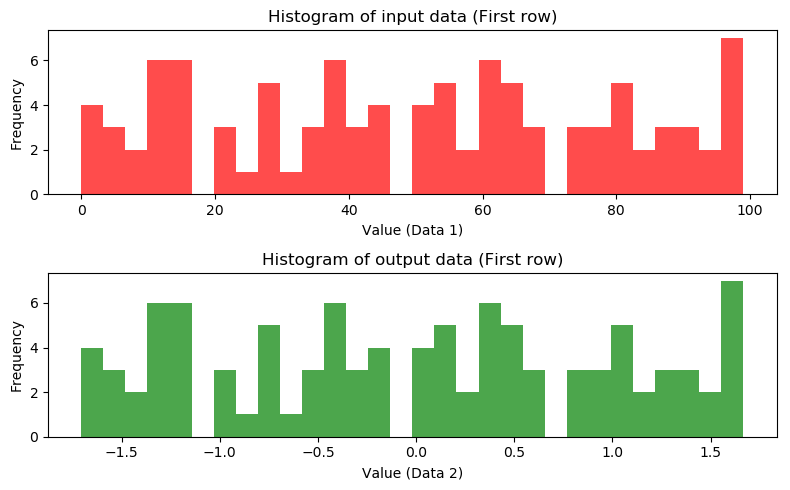

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
data1 =  input[:,0]
data2 =  output[:,0]

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Plot histogram for data1 on the first subplot
ax1.hist(data1, bins=30, color='red', alpha=0.7)
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of input data (First row)')
ax1.xaxis.set_ticks_position('bottom')  # Set x-axis ticks position at the bottom
ax1.xaxis.set_label_position('bottom')  # Set x-axis label position at the bottom
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)

# Plot histogram for data2 on the second subplot
ax2.hist(data2, bins=30, color='green', alpha=0.7)
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of output data (First row)')
ax2.xaxis.set_ticks_position('bottom')  # Set x-axis ticks position at the bottom
ax2.xaxis.set_label_position('bottom')  # Set x-axis label position at the bottom
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)

# Set x-axis labels
ax1.set_xlabel('Value (Data 1)')
ax2.set_xlabel('Value (Data 2)')

# Show the plot
plt.tight_layout()
plt.show()


<div style="border: 2px solid #8a2be2; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Exploring Batch Normalization Techniques:</p>

<p style="font-size: 14px;">In the following cell, we'll create a scatter plot comparing the performance of batch normalization implemented in PyTorch with batch normalization implemented from scratch. The x-axis represents the results of batch normalization using PyTorch's built-in function, while the y-axis represents the results of batch normalization implemented manually. This comparison will provide insights into the effectiveness and accuracy of the two approaches.</p>
</div>


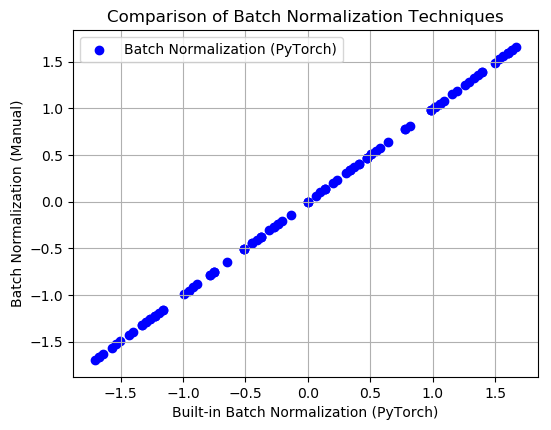

In [45]:
x =  output[: , 0]
y =  (input[:,0] - input[: , 0].mean() ) / input[:, 0].std()
plt.figure(figsize=(6, 4.5))
plt.scatter(x, y, color='blue', label='Batch Normalization (PyTorch)')
plt.xlabel('Built-in Batch Normalization (PyTorch)')
plt.ylabel('Batch Normalization (Manual)')
plt.title('Comparison of Batch Normalization Techniques')
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 2px solid #8a2be2; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Importance of Embedding for Categorical Variables:</p>

<p style="font-size: 14px;">Embedding plays a pivotal role in handling categorical variables within machine learning and deep learning models. Categorical variables, such as gender, city, or product category, are inherently non-numeric and cannot be directly used as inputs to machine learning algorithms. Embedding provides a means to represent these categorical variables in a continuous, high-dimensional space where relationships between categories can be captured and utilized by the model.</p>

<p style="font-size: 14px;">By mapping each category to a unique vector representation through embedding, categorical variables become suitable for processing by neural networks. Embedding not only preserves the semantic relationships between categories but also enables the model to learn meaningful representations directly from the data, leading to improved performance in various tasks such as classification, recommendation systems, and natural language processing.</p>
</div>


In [189]:
# Why chossing number less than 8 will be problematic?? serach for that
embedding = nn.Embedding(8, 2)

embedding( torch.LongTensor( df['cp'].astype('category').cat.codes.values ) )


df_for_plot =  embedding( torch.LongTensor( df['cp'].astype('category').cat.codes.values ) ).detach().numpy()
df_for_plot = pd.DataFrame( df_for_plot , columns =['E1' , 'E2'] ).assign(Category =  df['cp'] )

C:\Users\rasou\anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  after removing the cwd from sys.path.


In [191]:
### add a titel for the following graph

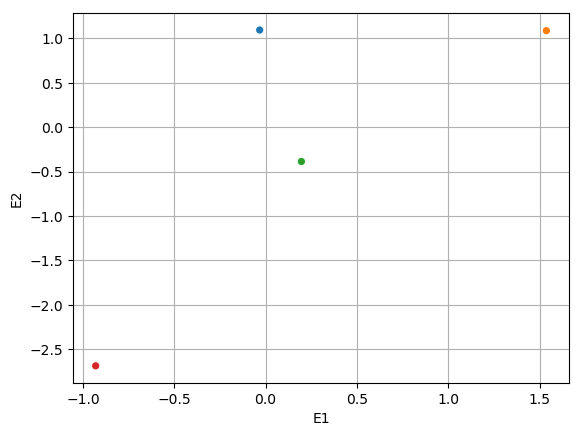

In [192]:
sns.scatterplot(data= df_for_plot , x="E1", y="E2", hue="Category")
plt.grid()
plt.legend([],[], frameon=False)
plt.show()

<div style="border: 2px solid #8a2be2; padding: 10px;">
<p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Purpose of Activation Functions in Neural Networks</p>
<p style="font-size: 14px;">
Activation functions are a crucial component of neural networks. Their primary purpose is to introduce non-linearity into the network. Without activation functions, the network would essentially behave as a linear regression model, regardless of the number of layers. This would limit the network's ability to learn complex patterns and representations from the data.
</p>
<p style="font-size: 14px;">
By applying an activation function to the output of each neuron, we allow the network to capture intricate patterns and interactions in the data, enabling it to solve more complex tasks. Activation functions also help in maintaining the stability of the network during training.
</p>
<p style="font-size: 14px;">
Here are some commonly used activation functions:
</p>
<ul style="font-size: 14px;">
<li><span style="font-weight: bold; color: #ff7f0e;">Sigmoid</span>: $\sigma(x) = \frac{1}{1 + e^{-x}}$</li>
<li><span style="font-weight: bold; color: #ff7f0e;">Tanh</span>: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$</li>
<li><span style="font-weight: bold; color: #ff7f0e;">ReLU (Rectified Linear Unit)</span>: $\text{ReLU}(x) = \max(0, x)$</li>
<li><span style="font-weight: bold; color: #ff7f0e;">Leaky ReLU</span>: $\text{Leaky ReLU}(x) = \max(0.01x, x)$</li>
<li><span style="font-weight: bold; color: #ff7f0e;">Softmax</span>: $\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$</li>
</ul>
<p style="font-size: 14px;">
Each activation function has its own properties and is chosen based on the specific requirements of the neural network and the problem at hand. For instance, ReLU is commonly used in hidden layers due to its simplicity and efficiency, while Softmax is typically used in the output layer of classification tasks.
</p>
</div>


<div style="border: 2px solid black; padding: 10px;">
    <p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Most Commonly Used Activation Function: ReLU</p>
    <p style="font-size: 14px;">
        The <span style="font-weight: bold; color: #ff7f0e;">ReLU (Rectified Linear Unit)</span> activation function is the most widely used activation function in modern neural networks. The function is defined as:
    </p>
    <p style="font-size: 14px; text-align: center;">
        $\text{ReLU}(x) = \max(0, x)$
    </p>
    <p style="font-size: 14px;">
        <strong>Reasons for Popularity:</strong>
    </p>
    <ul style="font-size: 14px;">
        <li><strong>Computational Efficiency:</strong> ReLU is simpler and faster to compute compared to sigmoid and tanh functions.</li>
        <li><strong>Sparsity:</strong> ReLU activation leads to sparse representations (many zeros), which can improve the efficiency of the network.</li>
        <li><strong>Mitigating Vanishing Gradients:</strong> ReLU helps in maintaining the gradient flow during backpropagation, addressing the vanishing gradient problem that is common with sigmoid and tanh.</li>
        <li><strong>Empirical Performance:</strong> Networks with ReLU tend to converge faster and perform better in practice.</li>
    </ul>
    <p style="font-size: 14px;">
        Due to these advantages, ReLU has become the default choice for activation functions in many neural network architectures.
    </p>
    <p style="font-size: 14px;">
        In the following graph, you can see the graph of the ReLU function:
    </p>
    <p style="text-align: center;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg" alt="ReLU Function Graph" width="300">
    </p>
</div>


<div style="border: 2px solid black; padding: 10px;">
    <p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Another Common Activation Function: Sigmoid</p>
    <p style="font-size: 14px;">
        The <span style="font-weight: bold; color: #ff7f0e;">Sigmoid</span> activation function is another widely used activation function in neural networks. The function is defined as:
    </p>
    <p style="font-size: 14px; text-align: center;">
        $\sigma(x) = \frac{1}{1 + e^{-x}}$
    </p>
    <p style="font-size: 14px;">
        <strong>Characteristics:</strong>
    </p>
    <ul style="font-size: 14px;">
        <li><strong>Output Range:</strong> The sigmoid function outputs values between 0 and 1, making it useful for binary classification problems.</li>
        <li><strong>Smooth Gradient:</strong> The sigmoid function has a smooth gradient, which helps with the optimization of the neural network.</li>
        <li><strong>Probabilistic Interpretation:</strong> The output of the sigmoid function can be interpreted as the probability of a particular class in binary classification.</li>
        <li><strong>Vanishing Gradient Problem:</strong> The sigmoid function can suffer from vanishing gradients, particularly for inputs that are very large or very small, which can slow down the training of deep networks.</li>
    </ul>
    <p style="font-size: 14px;">
        In the following graph, you can see the graph of the sigmoid function:
    </p>
    <p style="text-align: center;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" alt="Sigmoid Function Graph" width="300">
    </p>
</div>


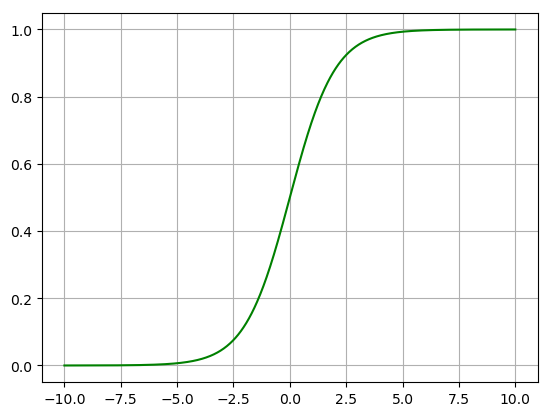

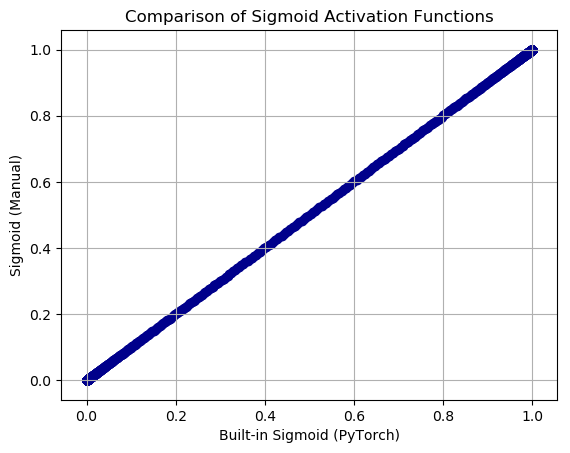

In [173]:
x =  np.linspace(-10 , 10 ,1000)
simoid_pytorch = F.sigmoid(torch.tensor(x) )

plt.plot(x , simoid_pytorch , color = 'green' )
plt.grid()
plt.xlabel('X')
plt.ylabel()
plt.show()


sigmoid_manual = 1 / (1 + np.e**(-x))
plt.scatter( simoid_pytorch  , sigmoid_manual , color = 'darkblue' )
plt.xlabel('Built-in Sigmoid (PyTorch)')
plt.ylabel('Sigmoid (Manual)')
plt.title('Comparison of Sigmoid Activation Functions')
plt.grid(True)
plt.show()

<div style="border: 2px solid #8a2be2; padding: 10px;">
    <p style="font-size: 16px; font-weight: bold; color: #1f77b4;">Dropout Layer in PyTorch</p>
    <p style="font-size: 14px;">
        The <span style="font-weight: bold; color: #ff7f0e;">Dropout layer</span> in PyTorch is a regularization technique used to prevent overfitting in neural networks. It works by randomly setting a fraction of input units to zero during the forward pass. The dropout rate is a hyperparameter that determines the probability of dropping out each unit.
    </p>
    <p style="font-size: 14px;">
        <strong>Why Do We Need Dropout?</strong>
    </p>
    <ul style="font-size: 14px;">
        <li><strong>Preventing Overfitting:</strong> Dropout helps prevent overfitting by introducing noise into the network and reducing the reliance on any single neuron during training.</li>
        <li><strong>Improving Generalization:</strong> By randomly dropping units, dropout forces the network to learn more robust features that are useful across different parts of the input space, leading to better generalization.</li>
        <li><strong>Ensembling Effect:</strong> Dropout can be interpreted as training multiple networks with shared weights. During inference, the effect of dropout is removed, but the predictions are averaged over the different dropout masks, resulting in an ensemble effect that improves performance.</li>
        <li><strong>Reducing Sensitivity to Weight Initialization:</strong> Dropout reduces the sensitivity of the network to the initial weights, making it less dependent on the specific weight initialization.</li>
    </ul>
    <p style="font-size: 14px;">
        Dropout is typically applied to hidden layers of the network during training. However, it is important to note that dropout is only used during training and is turned off during inference.
    </p>
</div>


In [220]:
p = 0.2
dropout = nn.Dropout(p = p)
input_tensor =  torch.tensor( df[['age' , 'ca']].head().values )
output = dropout( input_tensor) 
print(input_tensor)
print('\n')
print(output)

# Choose a non-zero value from the first matrix 
# and multiply it by 1 / (1 - p)
# then you will get the corresponding value in the seond matrix (If it is nopt zero)


tensor([[63.,  0.],
        [67.,  3.],
        [67.,  2.],
        [37.,  0.],
        [41.,  0.]], dtype=torch.float64)


tensor([[78.7500,  0.0000],
        [83.7500,  3.7500],
        [ 0.0000,  2.5000],
        [46.2500,  0.0000],
        [51.2500,  0.0000]], dtype=torch.float64)
